# **<font color='darkgray'>@panData</font>**
## **<font color='darkgray'>Data Science for Multivariate Data Analysis</font>**
## **<font color='darkgray'>Complete Process of Multivariate Exploratory Data Analysis</font>**



### **Installing and Loading Packages**


In [1]:
# To update a package, run the command below in the terminal or command prompt:
# pip install -U package_name

# To install the exact version of a package, run the command below in the terminal or command prompt:
# !pip install package_name==desired_version

# After installing or updating the package, restart the Jupyter Notebook.

# Install the watermark package.
# This package is used to record the versions of other packages used in this Jupyter Notebook.
!pip install -q -U watermark


https://pypi.org/project/missingno/

In [2]:
!pip install -q missingno

In [3]:
# Imports
import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Versions of the packages used in this Jupyter Notebook
%reload_ext watermark
%watermark -a "@panData"

Author: @panData



### **Loading Data**


In [5]:
# Load the dataset
df = pd.read_csv("dataset.csv")

In [6]:
df.shape

(2237, 25)

In [7]:
df['Education'].unique()

array(['Graduação', 'PhD', 'Mestrado', 'Ensino Médio',
       'Ensino Fundamental'], dtype=object)

In [8]:
import pandas as pd

# Mapping dictionary for translation
mapping = {
    'Education': {
        'Graduação': 'Undegraduate',
        'PhD': 'PhD',
        'Mestrado': 'Master',
        'Ensino Médio': 'High School',
        'Ensino Fundamental': 'Elementary School'
    },
    'Marital_Status': {
        'Casado': 'Married',
        'Solteiro': 'Single',
        'Viúvo': 'Widowed',
        'Divorciado': 'Divorced'
    }
}

# Apply mapping to specific columns without losing other variable values
df = df.replace(mapping)

In [9]:
df['Education'].unique()

array(['Undegraduate', 'PhD', 'Master', 'High School',
       'Elementary School'], dtype=object)

In [10]:
# Dimensions of the DataFrame
df.shape

(2237, 25)

In [11]:
# Viewing the first few rows of the DataFrame
df.head()

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Per_Month,Accepted_Campaign_1,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6
0,9970,1977,Undegraduate,Married,"$55,375.00",0,1,10/17/13,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Married,"$77,037.00",0,1,10/13/13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Undegraduate,Single,"$24,163.00",1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Married,"$69,476.00",0,0,9/30/13,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Undegraduate,Married,"$72,063.00",0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


In [12]:
df.sample()

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Per_Month,Accepted_Campaign_1,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6
1597,3732,1955,Master,Married,"$52,750.00",0,1,2002-04-13,393,0,...,5,7,9,4,0,0,0,0,0,0


In [13]:
df.tail()

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Per_Month,Accepted_Campaign_1,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6
2232,5922,1974,PhD,Married,"$40,344.00",0,1,10/13/13,210,0,...,4,1,5,7,0,0,0,0,0,0
2233,7250,1978,Undegraduate,Married,"$57,867.00",1,0,2010-01-13,344,35,...,7,2,9,6,0,0,0,0,0,0
2234,2478,1973,Undegraduate,Married,"$25,410.00",1,0,8/31/13,2,2,...,1,0,4,4,0,0,0,0,0,0
2235,1160,1970,Undegraduate,Married,"$13,260.00",1,1,8/23/13,9,4,...,3,0,3,8,0,0,0,0,0,0
2236,9214,1991,Undegraduate,Married,"$42,691.00",0,0,8/16/13,179,2,...,5,1,6,5,0,0,0,0,0,0


In [14]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          2237 non-null   int64 
 1   Birth_Year                  2237 non-null   int64 
 2   Education                   2237 non-null   object
 3   Marital_Status              2237 non-null   object
 4   Income                      2213 non-null   object
 5   Kids_At_Home                2237 non-null   int64 
 6   Teens_At_Home               2237 non-null   int64 
 7   Customer_Registration_Date  2237 non-null   object
 8   Wine_Expenses               2237 non-null   int64 
 9   Fruit_Expenses              2237 non-null   int64 
 10  Meat_Expenses               2237 non-null   int64 
 11  Fish_Expenses               2237 non-null   int64 
 12  Sweet_Expenses              2237 non-null   int64 
 13  Other_Expenses              2237 non-null   int6

## **Data Cleaning and Initial Processing**


In [15]:
# Let's remove the extra space from the column headers
df.columns = df.columns.str.replace(' ', '')

In [16]:
# The "Income" variable contains the $ character. Let's remove this special character to convert the column to numeric.
df['Income'] = df['Income'].str.replace('$', '').str.replace(',', '').astype(float)

In [17]:
# The date column is currently of type object. Let's convert it to datetime type
df['Customer_Registration_Date'] = pd.to_datetime(df['Customer_Registration_Date'])

In [18]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          2237 non-null   int64         
 1   Birth_Year                  2237 non-null   int64         
 2   Education                   2237 non-null   object        
 3   Marital_Status              2237 non-null   object        
 4   Income                      2213 non-null   float64       
 5   Kids_At_Home                2237 non-null   int64         
 6   Teens_At_Home               2237 non-null   int64         
 7   Customer_Registration_Date  2237 non-null   datetime64[ns]
 8   Wine_Expenses               2237 non-null   int64         
 9   Fruit_Expenses              2237 non-null   int64         
 10  Meat_Expenses               2237 non-null   int64         
 11  Fish_Expenses               2237 non-null   int64       

In [19]:
# Sample of the data
df.head()

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Per_Month,Accepted_Campaign_1,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6
0,9970,1977,Undegraduate,Married,55375.0,0,1,2013-10-17,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Married,77037.0,0,1,2013-10-13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Undegraduate,Single,24163.0,1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Married,69476.0,0,0,2013-09-30,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Undegraduate,Married,72063.0,0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


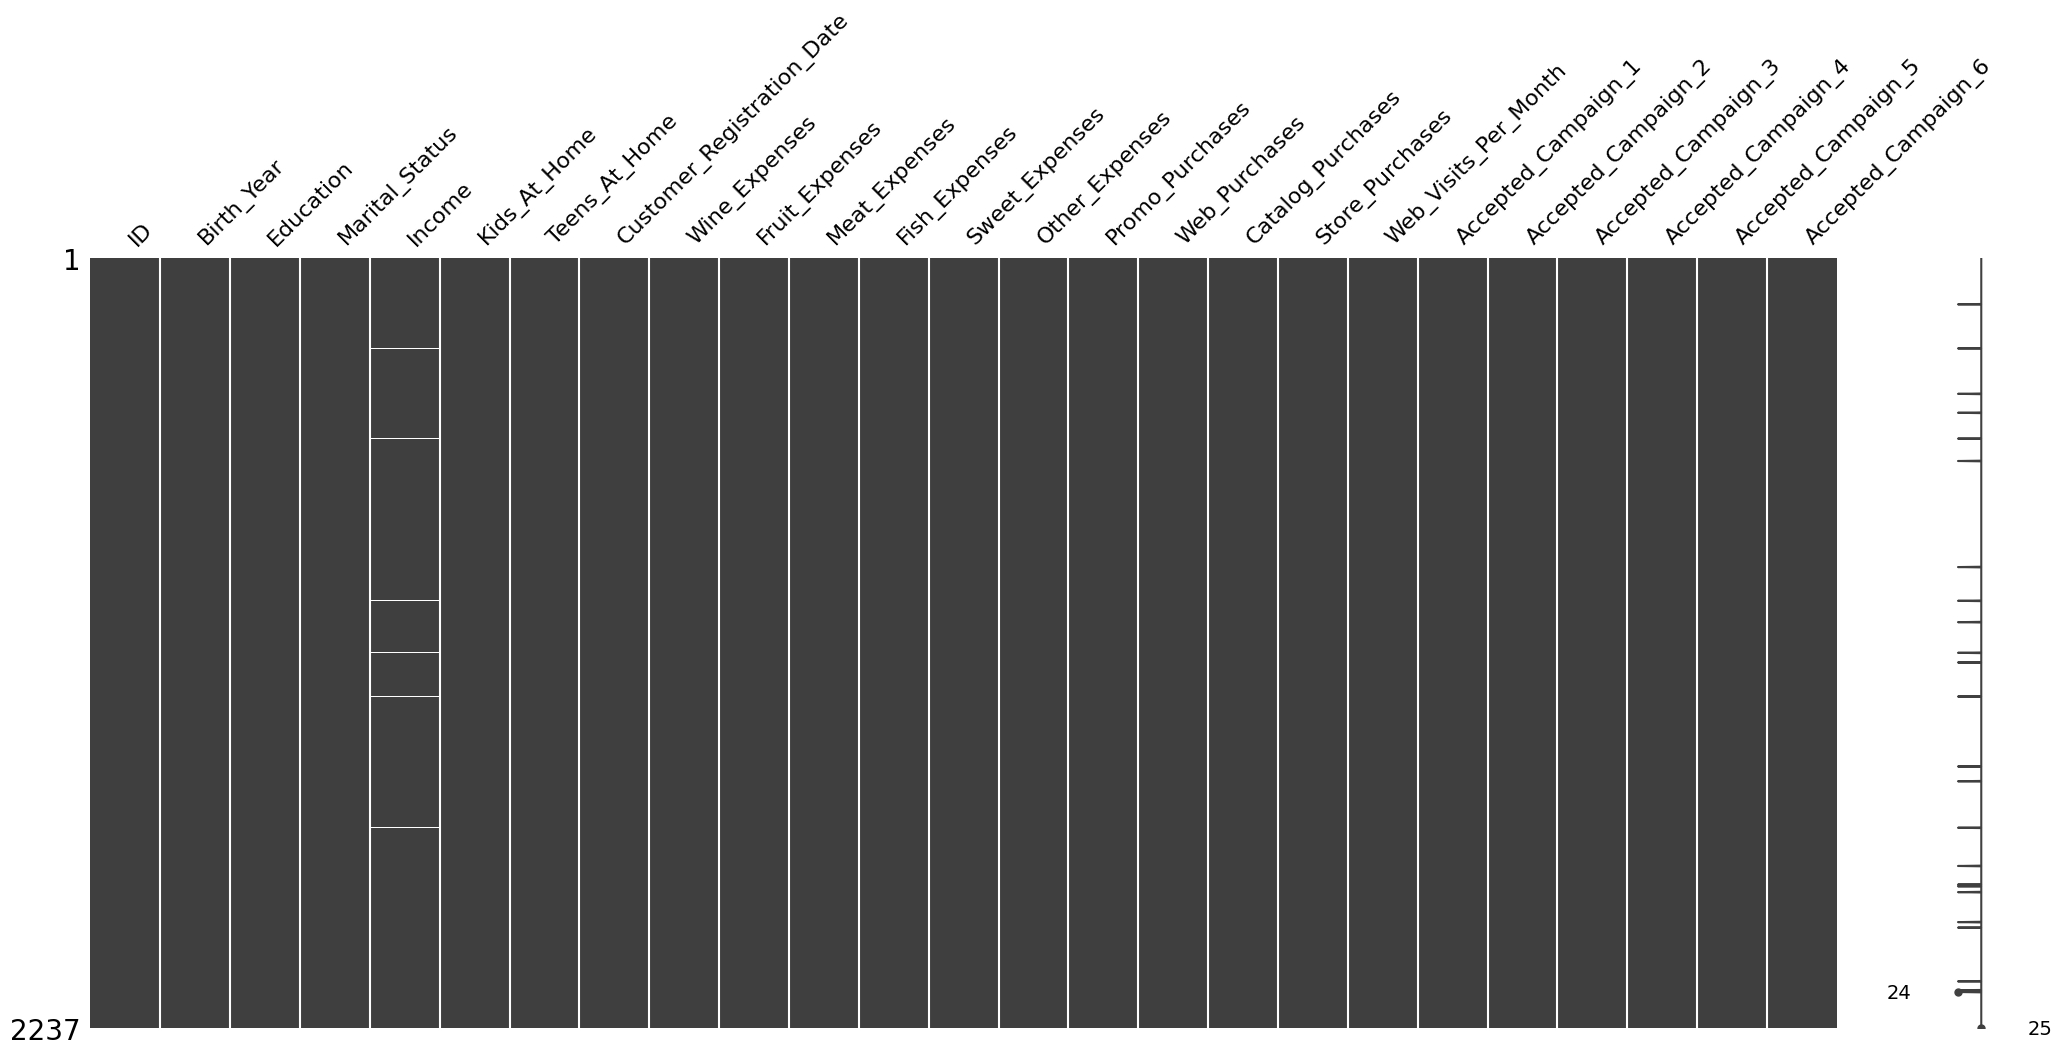

In [20]:
# Matrix of missing values
msno.matrix(df)
plt.show()

In [21]:
# Sum of missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

,0
Income,24
ID,0
Other_Expenses,0
Accepted_Campaign_5,0
Accepted_Campaign_4,0
Accepted_Campaign_3,0
Accepted_Campaign_2,0
Accepted_Campaign_1,0
Web_Visits_Per_Month,0
Store_Purchases,0


In [22]:
# We filter for those that are different from zero
print(missing_values.loc[missing_values != 0])

Income    24
dtype: int64


To handle missing values, we should first check for outliers in the variable, which will help in making the best decision for treating the missing values.

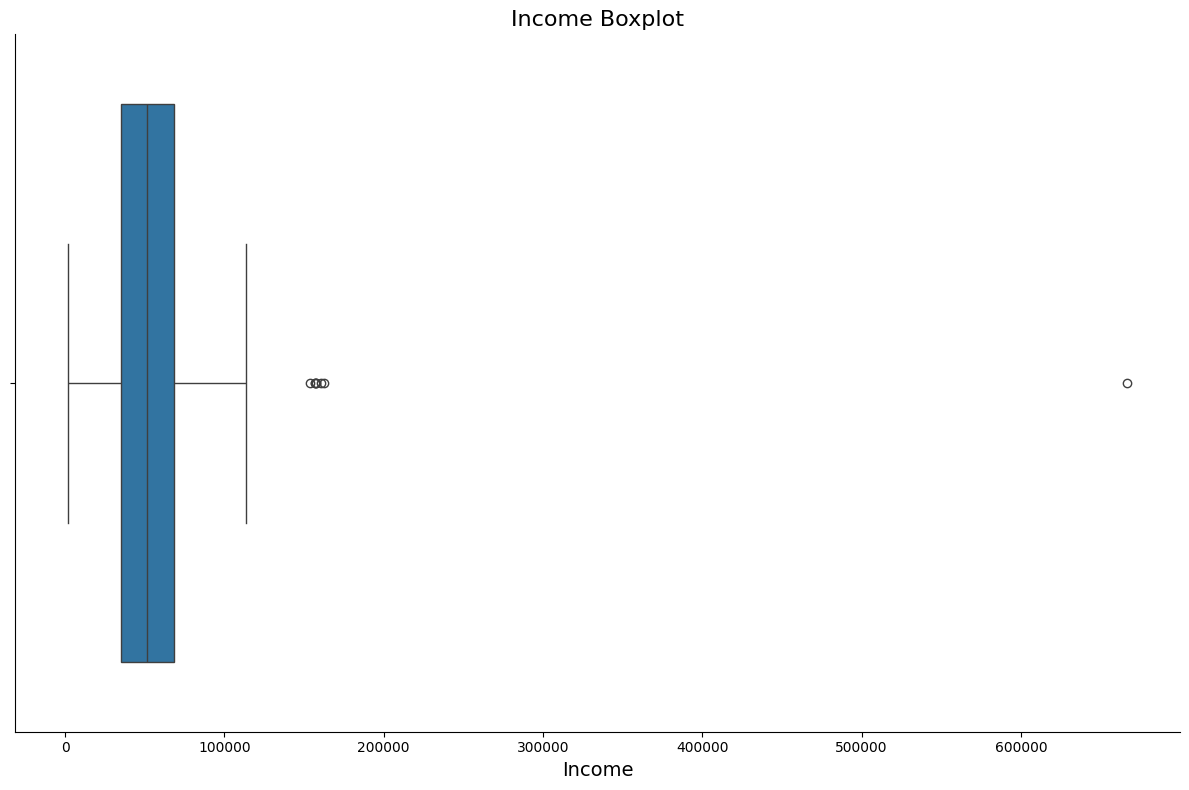

In [23]:
# Adjust the figure size to fill the area
fig, ax = plt.subplots(figsize=(12, 8))  # Increase the figure size

# Create the boxplot
sns.boxplot(x=df['Income'], ax=ax)

# Set title and labels
ax.set_title('Income Boxplot', fontsize=16)
ax.set_xlabel('Income', fontsize=14)

# Remove unnecessary borders and ensure a clean background
sns.despine()
ax.set_facecolor('white')

# Display the plot with tight layout
plt.tight_layout()
plt.show()


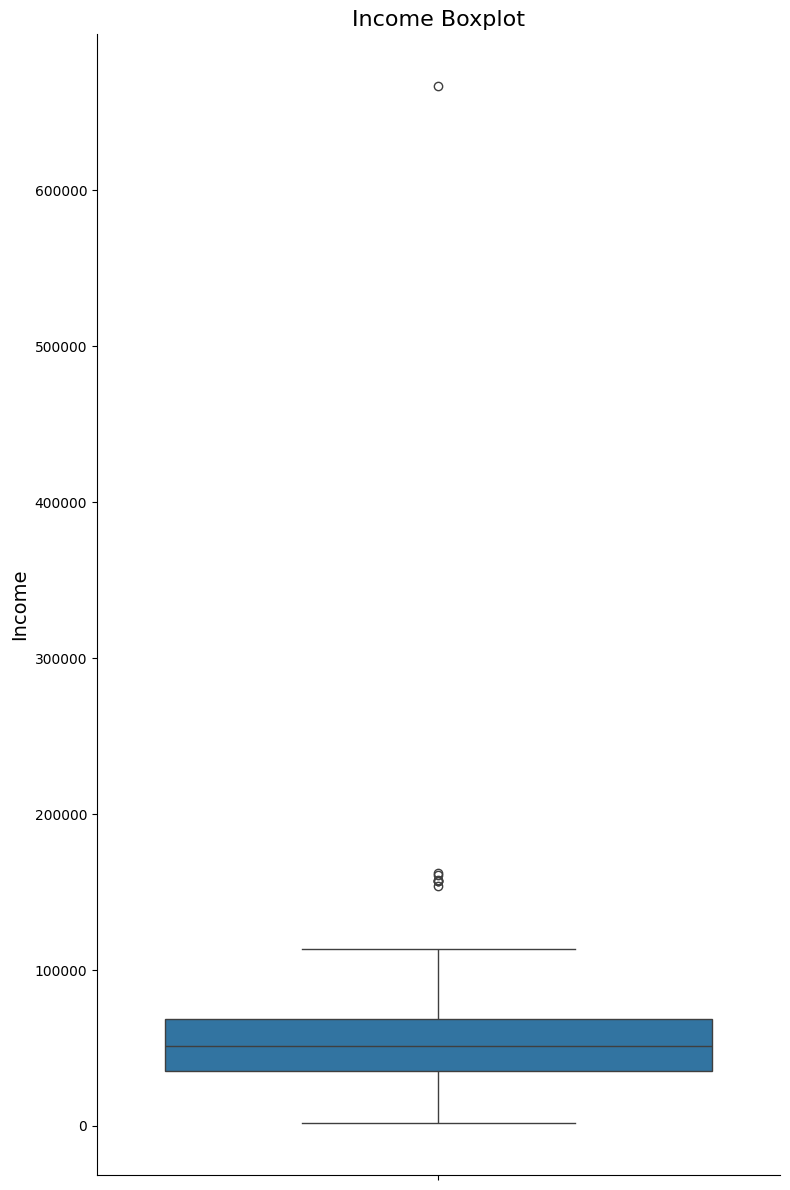

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the figure size to fill the area
fig, ax = plt.subplots(figsize=(8, 12))  # Adjusting for vertical orientation

# Create the boxplot in vertical orientation
sns.boxplot(y=df['Income'], ax=ax)

# Set title and labels
ax.set_title('Income Boxplot', fontsize=16)
ax.set_ylabel('Income', fontsize=14)

# Remove unnecessary borders and ensure a clean background
sns.despine()
ax.set_facecolor('white')

# Display the plot with tight layout
plt.tight_layout()
plt.show()


Yes, there seem to be outliers. Let's confirm this using the statistical rule.


In [25]:
# Calculating the IQR for the 'Income' column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

In [26]:
# Defining the bounds to consider a point as an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [27]:
# Identifying the outliers
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
outliers

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Per_Month,Accepted_Campaign_1,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6
325,4931,1977,Undegraduate,Married,157146.0,0,0,2013-04-29,1,0,...,0,28,0,1,0,0,0,0,0,0
497,1501,1982,PhD,Married,160803.0,0,0,2008-04-12,55,16,...,0,28,1,0,0,0,0,0,0,0
526,9432,1977,Undegraduate,Married,666666.0,1,0,2006-02-13,9,14,...,3,1,3,6,0,0,0,0,0,0
730,1503,1976,PhD,Married,162397.0,1,1,2006-03-13,85,1,...,0,0,1,1,0,0,0,0,0,0
851,5336,1971,Master,Married,157733.0,1,0,2006-04-13,39,1,...,1,0,1,1,0,0,0,0,0,0
1787,5555,1975,Undegraduate,Divorced,153924.0,0,0,2002-07-14,1,1,...,0,0,0,0,0,0,0,0,0,0
1886,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,2,1,...,0,0,0,0,0,0,0,0,0,0
2165,8475,1973,PhD,Married,157243.0,0,1,2003-01-14,20,2,...,0,22,0,0,0,0,0,0,0,0


Let's check the distribution of the variable.


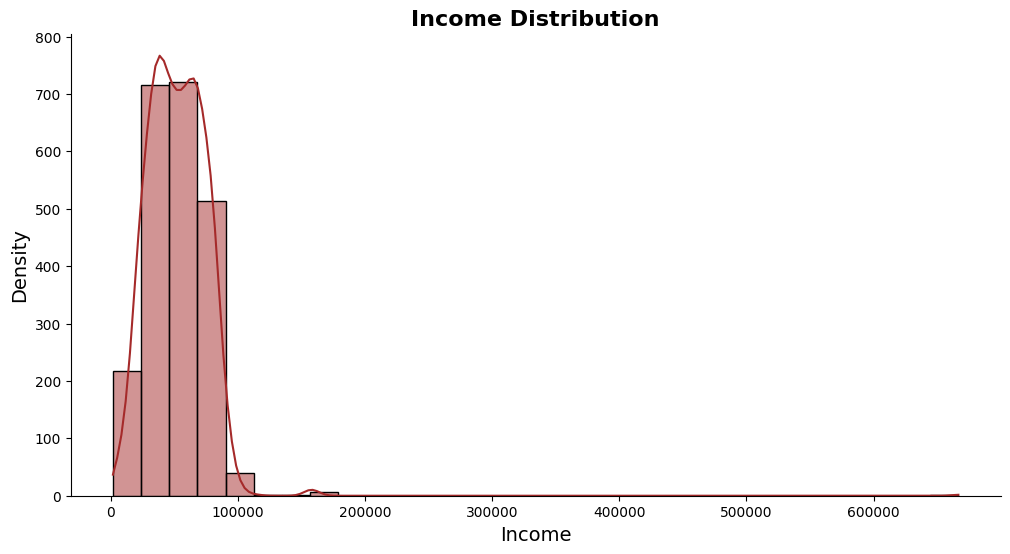

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the figure size
plt.figure(figsize=(12, 6))

# Creating the distribution plot
sns.histplot(df['Income'], kde=True, color='brown', bins=30)

# Setting the title and axis labels
plt.title('Income Distribution', size=16, weight='bold')
plt.xlabel('Income', size=14)
plt.ylabel('Density', size=14)

# Removing unnecessary borders
sns.despine()

# Displaying the plot
plt.show()

There are several strategies for dealing with outliers in a dataset, and the best approach depends on the specific context and the objective of the analysis. Here are some common options:

1. **Removal**: Simply removing the outliers from the dataset. This is a straightforward approach, but it may not be ideal if the number of outliers is significant or if these points contain important information.
   
2. **Replacement**: Replacing the outlier values with more representative ones, such as the mean or median of the data. This approach is useful if the outliers are considered to be measurement errors or data entry mistakes.

3. **Transformation**: Applying a transformation to the data can reduce the impact of outliers. Common transformations include logarithmic, square root, or Box-Cox.

4. **Capping**: Setting an upper and/or lower limit for the data values. Values beyond these limits are brought to the nearest boundary. For example, all values above the upper limit are set to that limit.

5. **Separate Analysis**: Sometimes, outliers are retained in the dataset and analyzed separately to better understand their characteristics.

6. **Cause Analysis**: Investigating the cause of the outliers. If they result from a real phenomenon, it may be important to include them in the analysis.

The choice of method depends on the nature of the data and the objective of the analysis. In many cases, a combination of these strategies may be the most effective.

Let's simply remove the outliers since there are only a few records.


In [29]:
# Filtering the dataframe and removing the outliers
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

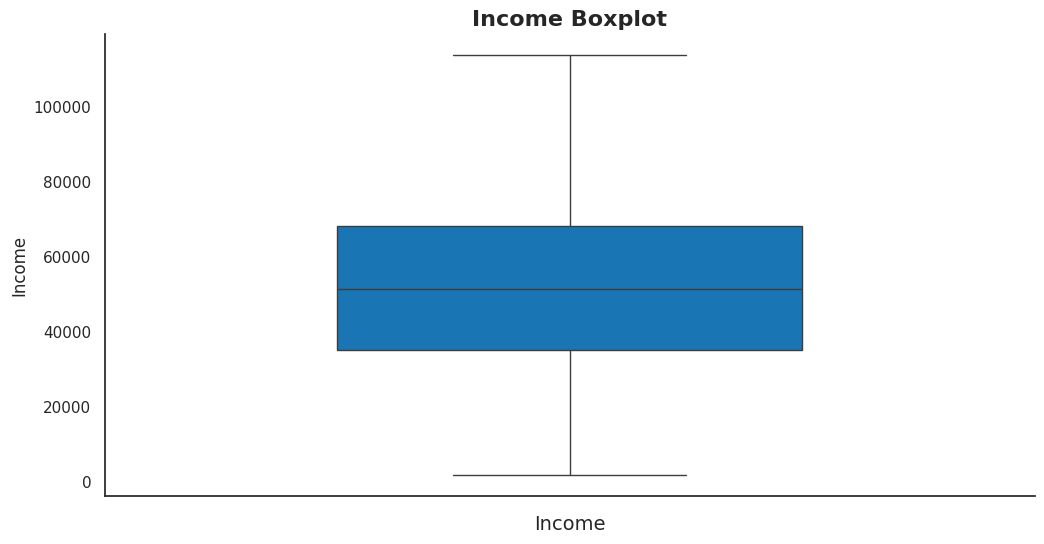

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusting the figure size and removing gridlines
plt.figure(figsize=(12, 6))
sns.set(style="white")

# Creating a simple and clean boxplot
sns.boxplot(df['Income'], color='#007acc', width=0.5)

# Setting the title and X-axis label
plt.title('Income Boxplot', fontsize=16, weight='bold')
plt.xlabel('Income', fontsize=14)

# Removing unnecessary borders
sns.despine()

# Displaying the plot
plt.show()

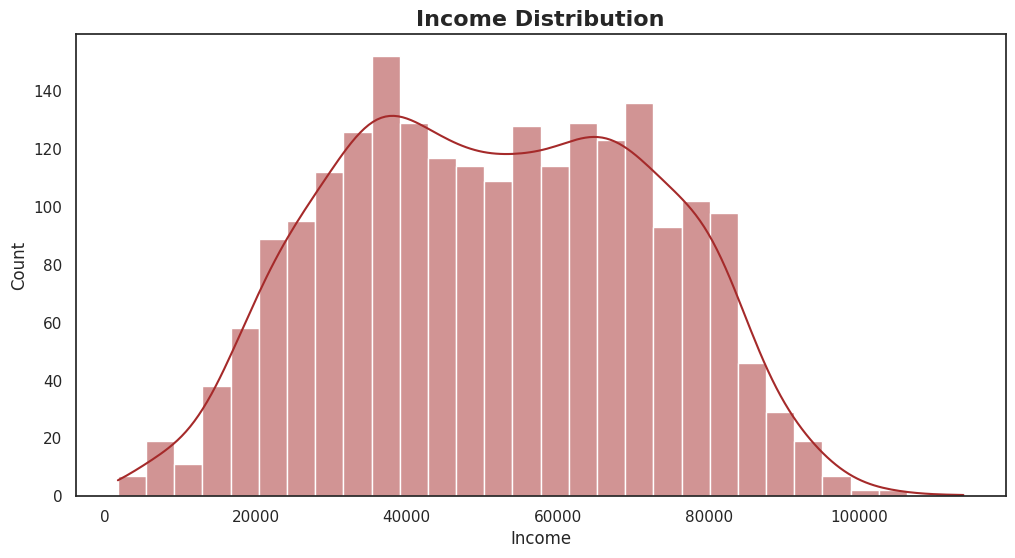

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the figure size
plt.figure(figsize=(12, 6))

# Creating the distribution plot
sns.histplot(df['Income'], kde=True, color='brown', bins=30)

# Setting the title
plt.title('Income Distribution', fontsize=16, weight='bold')

# Displaying the plot
plt.show()


Now we have handled the missing values.


In [32]:
# Normalize the data before applying KNNImputer (optional, but recommended)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Income']])

In [33]:
# Create the KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [34]:
# Impute the missing values with the imputer
data_imputed = imputer.fit_transform(data_scaled)

In [35]:
# Convert back to the original format
df['Income'] = scaler.inverse_transform(data_imputed)

In [36]:
print('Total Missing Values:', df.isnull().sum().sum())

Total Missing Values: 0


In [37]:
df.head()

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Per_Month,Accepted_Campaign_1,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6
0,9970,1977,Undegraduate,Married,55375.0,0,1,2013-10-17,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Married,77037.0,0,1,2013-10-13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Undegraduate,Single,24163.0,1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Married,69476.0,0,0,2013-09-30,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Undegraduate,Married,72063.0,0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


## **Exploratory Analysis and Feature Engineering**



In [38]:
# Columns
df.columns

Index(['ID', 'Birth_Year', 'Education', 'Marital_Status', 'Income',
       'Kids_At_Home', 'Teens_At_Home', 'Customer_Registration_Date',
       'Wine_Expenses', 'Fruit_Expenses', 'Meat_Expenses', 'Fish_Expenses',
       'Sweet_Expenses', 'Other_Expenses', 'Promo_Purchases', 'Web_Purchases',
       'Catalog_Purchases', 'Store_Purchases', 'Web_Visits_Per_Month',
       'Accepted_Campaign_1', 'Accepted_Campaign_2', 'Accepted_Campaign_3',
       'Accepted_Campaign_4', 'Accepted_Campaign_5', 'Accepted_Campaign_6'],
      dtype='object')

In [39]:
# In-memory drop of categorical columns to create the box plot for quantitative columns
data_boxplot = df.drop(columns = ['ID',
                                      'Education',
                                      'Marital_Status',
                                      'Kids_At_Home',
                                      'Customer_Registration_Date',
                                      'Teens_At_Home',
                                      'Accepted_Campaign_1',
                                      'Accepted_Campaign_2',
                                      'Accepted_Campaign_3',
                                      'Accepted_Campaign_4',
                                      'Accepted_Campaign_5',
                                      'Accepted_Campaign_6'])


In [40]:
data_boxplot.columns

Index(['Birth_Year', 'Income', 'Wine_Expenses', 'Fruit_Expenses',
       'Meat_Expenses', 'Fish_Expenses', 'Sweet_Expenses', 'Other_Expenses',
       'Promo_Purchases', 'Web_Purchases', 'Catalog_Purchases',
       'Store_Purchases', 'Web_Visits_Per_Month'],
      dtype='object')

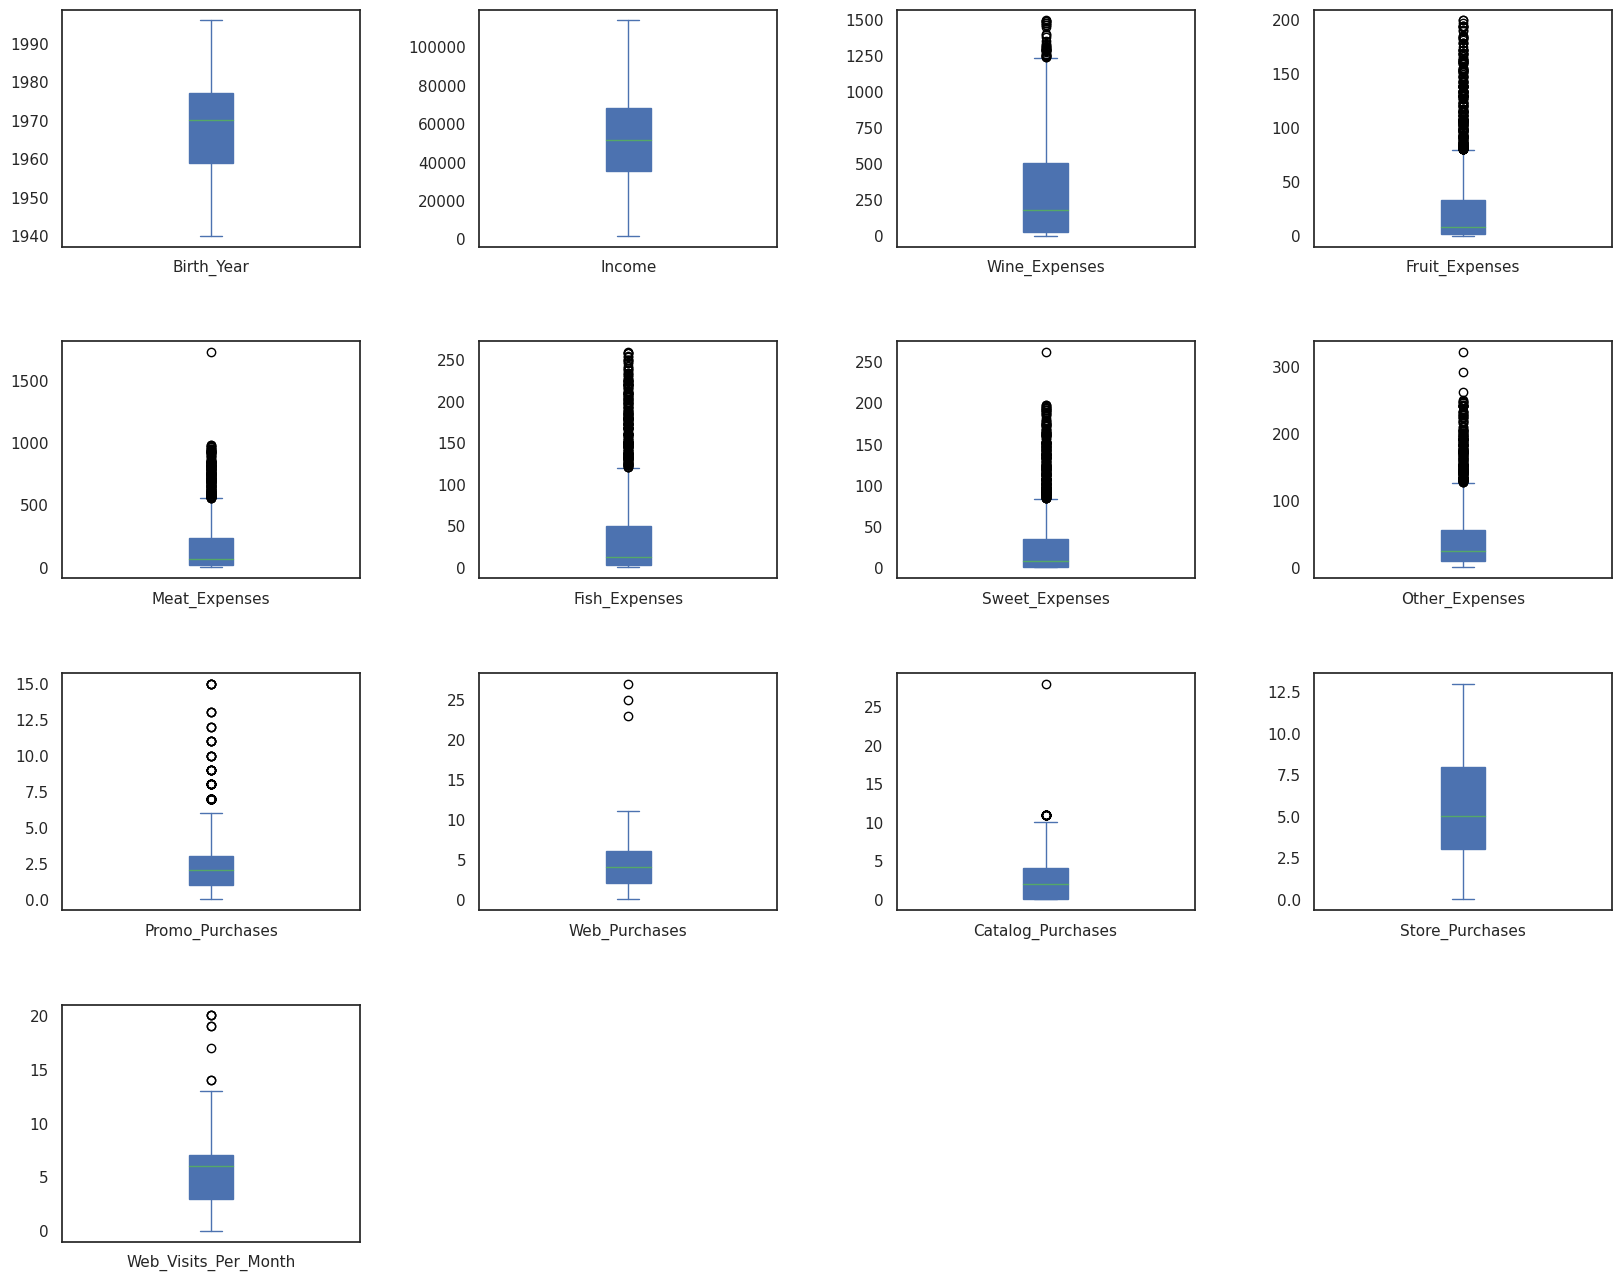

In [41]:
import matplotlib.pyplot as plt

# Ajuste para 4x4 subplots para preencher melhor o espaço
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))
data_boxplot.plot(subplots=True, layout=(4, 4), kind='box', ax=axes.flatten()[:13], patch_artist=True)

# Remove subplots vazios
for i in range(13, 16):
    fig.delaxes(axes.flatten()[i])

# Ajuste dos espaços
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

> Vamos transformar algumas variáveis, criar novas e combinar outras em um trabalho de engenharia de atributos que vai nos ajudar na exploração dos dados.

In [42]:
# Let's create a new column with each client's age (current year - year of birth)
current_year = datetime.now().year
df['Age'] = current_year - df['Birth_Year']

In [43]:
df.head()

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Catalog_Purchases,Store_Purchases,Web_Visits_Per_Month,Accepted_Campaign_1,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6,Age
0,9970,1977,Undegraduate,Married,55375.0,0,1,2013-10-17,42,11,...,1,6,2,0,0,0,0,0,0,47
1,4002,1960,PhD,Married,77037.0,0,1,2013-10-13,463,96,...,7,12,3,0,0,0,0,0,0,64
2,10914,1970,Undegraduate,Single,24163.0,1,1,2010-12-13,4,1,...,0,3,4,0,0,0,0,0,0,54
3,7279,1969,PhD,Married,69476.0,0,0,2013-09-30,260,86,...,6,4,2,0,0,0,0,0,0,55
4,10582,1979,Undegraduate,Married,72063.0,0,1,2007-03-13,180,32,...,2,12,2,0,0,0,0,0,0,45


In [44]:
# We will create a column with the number of days as a customer since the registration date
df['Days_As_Customer'] = df['Customer_Registration_Date'].max() - df['Customer_Registration_Date']

In [45]:
df.head()

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Store_Purchases,Web_Visits_Per_Month,Accepted_Campaign_1,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6,Age,Days_As_Customer
0,9970,1977,Undegraduate,Married,55375.0,0,1,2013-10-17,42,11,...,6,2,0,0,0,0,0,0,47,255 days
1,4002,1960,PhD,Married,77037.0,0,1,2013-10-13,463,96,...,12,3,0,0,0,0,0,0,64,259 days
2,10914,1970,Undegraduate,Single,24163.0,1,1,2010-12-13,4,1,...,3,4,0,0,0,0,0,0,54,1294 days
3,7279,1969,PhD,Married,69476.0,0,0,2013-09-30,260,86,...,4,2,0,0,0,0,0,0,55,272 days
4,10582,1979,Undegraduate,Married,72063.0,0,1,2007-03-13,180,32,...,12,2,0,0,0,0,0,0,45,2665 days


In [46]:
# We will remove the word "days" at the end of each value in the Days_As_Customer column
df['Days_As_Customer'] = df['Days_As_Customer'].astype(str).str.replace(' days', '')

In [47]:
df.head()

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Store_Purchases,Web_Visits_Per_Month,Accepted_Campaign_1,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6,Age,Days_As_Customer
0,9970,1977,Undegraduate,Married,55375.0,0,1,2013-10-17,42,11,...,6,2,0,0,0,0,0,0,47,255
1,4002,1960,PhD,Married,77037.0,0,1,2013-10-13,463,96,...,12,3,0,0,0,0,0,0,64,259
2,10914,1970,Undegraduate,Single,24163.0,1,1,2010-12-13,4,1,...,3,4,0,0,0,0,0,0,54,1294
3,7279,1969,PhD,Married,69476.0,0,0,2013-09-30,260,86,...,4,2,0,0,0,0,0,0,55,272
4,10582,1979,Undegraduate,Married,72063.0,0,1,2007-03-13,180,32,...,12,2,0,0,0,0,0,0,45,2665


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          2205 non-null   int64         
 1   Birth_Year                  2205 non-null   int64         
 2   Education                   2205 non-null   object        
 3   Marital_Status              2205 non-null   object        
 4   Income                      2205 non-null   float64       
 5   Kids_At_Home                2205 non-null   int64         
 6   Teens_At_Home               2205 non-null   int64         
 7   Customer_Registration_Date  2205 non-null   datetime64[ns]
 8   Wine_Expenses               2205 non-null   int64         
 9   Fruit_Expenses              2205 non-null   int64         
 10  Meat_Expenses               2205 non-null   int64         
 11  Fish_Expenses               2205 non-null   int64         
 1

In [49]:
# Adjust the data type of the Days_As_Customer variable
df['Days_As_Customer'] = pd.to_numeric(df['Days_As_Customer'], downcast='integer')

In [50]:
df.columns

Index(['ID', 'Birth_Year', 'Education', 'Marital_Status', 'Income',
       'Kids_At_Home', 'Teens_At_Home', 'Customer_Registration_Date',
       'Wine_Expenses', 'Fruit_Expenses', 'Meat_Expenses', 'Fish_Expenses',
       'Sweet_Expenses', 'Other_Expenses', 'Promo_Purchases', 'Web_Purchases',
       'Catalog_Purchases', 'Store_Purchases', 'Web_Visits_Per_Month',
       'Accepted_Campaign_1', 'Accepted_Campaign_2', 'Accepted_Campaign_3',
       'Accepted_Campaign_4', 'Accepted_Campaign_5', 'Accepted_Campaign_6',
       'Age', 'Days_As_Customer'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          2205 non-null   int64         
 1   Birth_Year                  2205 non-null   int64         
 2   Education                   2205 non-null   object        
 3   Marital_Status              2205 non-null   object        
 4   Income                      2205 non-null   float64       
 5   Kids_At_Home                2205 non-null   int64         
 6   Teens_At_Home               2205 non-null   int64         
 7   Customer_Registration_Date  2205 non-null   datetime64[ns]
 8   Wine_Expenses               2205 non-null   int64         
 9   Fruit_Expenses              2205 non-null   int64         
 10  Meat_Expenses               2205 non-null   int64         
 11  Fish_Expenses               2205 non-null   int64         
 1

In [52]:
# Create a variable for the Total Purchases made across the 3 different channels
df['Total_Purchases'] = df['Web_Purchases'] + df['Catalog_Purchases'] + df['Store_Purchases']

In [53]:
df.head()

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Web_Visits_Per_Month,Accepted_Campaign_1,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6,Age,Days_As_Customer,Total_Purchases
0,9970,1977,Undegraduate,Married,55375.0,0,1,2013-10-17,42,11,...,2,0,0,0,0,0,0,47,255,8
1,4002,1960,PhD,Married,77037.0,0,1,2013-10-13,463,96,...,3,0,0,0,0,0,0,64,259,26
2,10914,1970,Undegraduate,Single,24163.0,1,1,2010-12-13,4,1,...,4,0,0,0,0,0,0,54,1294,4
3,7279,1969,PhD,Married,69476.0,0,0,2013-09-30,260,86,...,2,0,0,0,0,0,0,55,272,14
4,10582,1979,Undegraduate,Married,72063.0,0,1,2007-03-13,180,32,...,2,0,0,0,0,0,0,45,2665,19


In [54]:
df.columns

Index(['ID', 'Birth_Year', 'Education', 'Marital_Status', 'Income',
       'Kids_At_Home', 'Teens_At_Home', 'Customer_Registration_Date',
       'Wine_Expenses', 'Fruit_Expenses', 'Meat_Expenses', 'Fish_Expenses',
       'Sweet_Expenses', 'Other_Expenses', 'Promo_Purchases', 'Web_Purchases',
       'Catalog_Purchases', 'Store_Purchases', 'Web_Visits_Per_Month',
       'Accepted_Campaign_1', 'Accepted_Campaign_2', 'Accepted_Campaign_3',
       'Accepted_Campaign_4', 'Accepted_Campaign_5', 'Accepted_Campaign_6',
       'Age', 'Days_As_Customer', 'Total_Purchases'],
      dtype='object')

In [55]:
# Create the Total_Spend variable with the sum of all columns that start with the name 'Expense'
df['Total_Spend'] = df.filter(like='Expense').sum(axis=1)

In [56]:
df.head()

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Accepted_Campaign_1,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6,Age,Days_As_Customer,Total_Purchases,Total_Spend
0,9970,1977,Undegraduate,Married,55375.0,0,1,2013-10-17,42,11,...,0,0,0,0,0,0,47,255,8,162
1,4002,1960,PhD,Married,77037.0,0,1,2013-10-13,463,96,...,0,0,0,0,0,0,64,259,26,1123
2,10914,1970,Undegraduate,Single,24163.0,1,1,2010-12-13,4,1,...,0,0,0,0,0,0,54,1294,4,17
3,7279,1969,PhD,Married,69476.0,0,0,2013-09-30,260,86,...,0,0,0,0,0,0,55,272,14,1044
4,10582,1979,Undegraduate,Married,72063.0,0,1,2007-03-13,180,32,...,0,0,0,0,0,0,45,2665,19,758


In [57]:
df.columns

Index(['ID', 'Birth_Year', 'Education', 'Marital_Status', 'Income',
       'Kids_At_Home', 'Teens_At_Home', 'Customer_Registration_Date',
       'Wine_Expenses', 'Fruit_Expenses', 'Meat_Expenses', 'Fish_Expenses',
       'Sweet_Expenses', 'Other_Expenses', 'Promo_Purchases', 'Web_Purchases',
       'Catalog_Purchases', 'Store_Purchases', 'Web_Visits_Per_Month',
       'Accepted_Campaign_1', 'Accepted_Campaign_2', 'Accepted_Campaign_3',
       'Accepted_Campaign_4', 'Accepted_Campaign_5', 'Accepted_Campaign_6',
       'Age', 'Days_As_Customer', 'Total_Purchases', 'Total_Spend'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          2205 non-null   int64         
 1   Birth_Year                  2205 non-null   int64         
 2   Education                   2205 non-null   object        
 3   Marital_Status              2205 non-null   object        
 4   Income                      2205 non-null   float64       
 5   Kids_At_Home                2205 non-null   int64         
 6   Teens_At_Home               2205 non-null   int64         
 7   Customer_Registration_Date  2205 non-null   datetime64[ns]
 8   Wine_Expenses               2205 non-null   int64         
 9   Fruit_Expenses              2205 non-null   int64         
 10  Meat_Expenses               2205 non-null   int64         
 11  Fish_Expenses               2205 non-null   int64         
 1

In [59]:
df['Accepted_Campaign_1'].value_counts()

,count
Accepted_Campaign_1,
0,2042
1,163


In [60]:
df['Accepted_Campaign_2'].value_counts()


,count
Accepted_Campaign_2,
0,2041
1,164


In [61]:
# We will create a variable to indicate if the customer accepted any campaign (and purchased the offered product)
df['campaign_accepted'] = df.filter(like='Accepted').sum(axis=1)

In [62]:
df.head()

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6,Age,Days_As_Customer,Total_Purchases,Total_Spend,campaign_accepted
0,9970,1977,Undegraduate,Married,55375.0,0,1,2013-10-17,42,11,...,0,0,0,0,0,47,255,8,162,0
1,4002,1960,PhD,Married,77037.0,0,1,2013-10-13,463,96,...,0,0,0,0,0,64,259,26,1123,0
2,10914,1970,Undegraduate,Single,24163.0,1,1,2010-12-13,4,1,...,0,0,0,0,0,54,1294,4,17,0
3,7279,1969,PhD,Married,69476.0,0,0,2013-09-30,260,86,...,0,0,0,0,0,55,272,14,1044,0
4,10582,1979,Undegraduate,Married,72063.0,0,1,2007-03-13,180,32,...,0,0,0,0,0,45,2665,19,758,0


In [63]:
df.sample(10)

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6,Age,Days_As_Customer,Total_Purchases,Total_Spend,campaign_accepted
2015,10307,1956,Undegraduate,Married,50387.0,0,2,2013-08-31,369,9,...,0,0,0,0,0,68,302,16,525,0
949,10469,1981,Undegraduate,Married,88325.0,0,0,2002-05-14,519,71,...,0,0,0,0,0,43,4429,17,1623,0
712,6798,1966,Undegraduate,Single,37070.0,1,1,2013-03-20,231,7,...,0,0,0,0,1,58,466,14,433,1
579,9855,1952,PhD,Single,62000.0,0,1,2013-08-25,899,0,...,0,0,1,0,0,72,308,25,1020,1
1513,8895,1985,Undegraduate,Single,70596.0,0,0,2010-05-12,347,44,...,0,0,0,0,0,39,1509,20,968,0
1616,8690,1962,Undegraduate,Married,86111.0,0,0,2013-04-19,399,28,...,0,0,0,0,0,62,436,22,1385,0
330,5302,1986,Undegraduate,Married,78394.0,0,0,2013-02-15,298,27,...,0,0,0,0,1,38,499,15,1428,1
378,10796,1984,Master,Married,30477.0,1,0,2014-01-22,47,1,...,0,0,0,0,0,40,158,5,66,0
155,8799,1984,PhD,Married,38175.0,1,0,2013-09-23,70,6,...,0,0,0,0,0,40,279,8,153,0
914,4838,1978,Undegraduate,Married,22775.0,1,0,2013-06-19,5,1,...,0,0,0,0,0,46,375,3,15,0


In [64]:
# Let's adjust the data type and place it in a new column
df['Campaign_Response'] = df['campaign_accepted'].apply(lambda x: 'Accepted' if x > 0 else 'Not Accepted')

In [65]:
df.head()

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6,Age,Days_As_Customer,Total_Purchases,Total_Spend,campaign_accepted,Campaign_Response
0,9970,1977,Undegraduate,Married,55375.0,0,1,2013-10-17,42,11,...,0,0,0,0,47,255,8,162,0,Not Accepted
1,4002,1960,PhD,Married,77037.0,0,1,2013-10-13,463,96,...,0,0,0,0,64,259,26,1123,0,Not Accepted
2,10914,1970,Undegraduate,Single,24163.0,1,1,2010-12-13,4,1,...,0,0,0,0,54,1294,4,17,0,Not Accepted
3,7279,1969,PhD,Married,69476.0,0,0,2013-09-30,260,86,...,0,0,0,0,55,272,14,1044,0,Not Accepted
4,10582,1979,Undegraduate,Married,72063.0,0,1,2007-03-13,180,32,...,0,0,0,0,45,2665,19,758,0,Not Accepted


In [66]:
df.sample(10)

,ID,Birth_Year,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Customer_Registration_Date,Wine_Expenses,Fruit_Expenses,...,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6,Age,Days_As_Customer,Total_Purchases,Total_Spend,campaign_accepted,Campaign_Response
658,7798,1972,High School,Married,46344.0,0,1,2012-12-14,233,20,...,0,0,0,0,52,562,13,429,0,Not Accepted
316,8164,1978,PhD,Married,82170.0,0,0,2013-11-25,1023,93,...,0,0,0,0,46,216,18,1908,0,Not Accepted
2054,10925,1983,Undegraduate,Married,76630.0,0,0,2014-01-14,255,31,...,0,0,0,0,41,166,24,1003,0,Not Accepted
1332,9576,1982,PhD,Married,32313.0,1,0,2002-11-13,86,4,...,0,0,0,0,42,4246,8,159,0,Not Accepted
2066,8204,1971,High School,Married,78041.0,0,0,2012-12-16,482,35,...,0,0,0,0,53,560,17,1319,0,Not Accepted
2040,7396,1966,Undegraduate,Married,80398.0,0,0,2011-10-12,342,51,...,1,0,0,0,58,991,25,1597,1,Accepted
268,1419,1950,Undegraduate,Married,34026.0,1,1,2008-05-13,18,6,...,0,0,0,0,74,2238,6,76,0,Not Accepted
1507,8387,1957,Undegraduate,Married,43140.0,0,1,2001-05-13,134,8,...,0,0,0,0,67,4795,10,235,0,Not Accepted
2111,999,1991,Undegraduate,Single,86037.0,0,0,2001-02-13,490,44,...,1,0,0,1,33,4884,24,730,3,Accepted
836,7660,1973,PhD,Single,35860.0,1,1,2014-05-19,15,0,...,0,0,0,1,51,41,4,49,2,Accepted


In [67]:
# Let's observe a random sample of the variables we created
df[['Age', 'Days_As_Customer', 'Total_Purchases', 'Total_Spend', 'Campaign_Response']].sample(10)

,Age,Days_As_Customer,Total_Purchases,Total_Spend,Campaign_Response
27,48,227,15,1053,Not Accepted
1195,72,2877,16,1165,Not Accepted
1171,74,639,21,1477,Accepted
357,46,4306,7,63,Not Accepted
2039,59,581,23,1658,Not Accepted
1217,61,526,6,114,Not Accepted
291,67,218,18,1334,Accepted
2086,34,459,14,1092,Accepted
1893,53,623,23,1564,Not Accepted
731,46,468,4,42,Not Accepted


In [68]:
# We no longer need these variables
df.drop(['Birth_Year', 'Customer_Registration_Date', 'campaign_accepted'], axis=1, inplace=True)

In [69]:
df.head()

,ID,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Wine_Expenses,Fruit_Expenses,Meat_Expenses,Fish_Expenses,...,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6,Age,Days_As_Customer,Total_Purchases,Total_Spend,Campaign_Response
0,9970,Undegraduate,Married,55375.0,0,1,42,11,57,10,...,0,0,0,0,0,47,255,8,162,Not Accepted
1,4002,PhD,Married,77037.0,0,1,463,96,333,168,...,0,0,0,0,0,64,259,26,1123,Not Accepted
2,10914,Undegraduate,Single,24163.0,1,1,4,1,7,2,...,0,0,0,0,0,54,1294,4,17,Not Accepted
3,7279,PhD,Married,69476.0,0,0,260,86,559,63,...,0,0,0,0,0,55,272,14,1044,Not Accepted
4,10582,Undegraduate,Married,72063.0,0,1,180,32,348,76,...,0,0,0,0,0,45,2665,19,758,Not Accepted


In [70]:
df.describe()

,ID,Income,Kids_At_Home,Teens_At_Home,Wine_Expenses,Fruit_Expenses,Meat_Expenses,Fish_Expenses,Sweet_Expenses,Other_Expenses,...,Accepted_Campaign_1,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6,Age,Days_As_Customer,Total_Purchases,Total_Spend
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000
mean,5585.439456,51622.094785,0.442177,0.506576,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.073923,0.074376,0.073016,0.064399,0.013605,0.15102,55.095692,1307.092971,12.569615,606.821769
std,3247.546423,20713.063826,0.537132,0.544380,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.261705,0.262442,0.260222,0.245518,0.115872,0.35815,11.705801,1429.824606,7.180350,601.675284
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,28.000000,0.000000,0.000000,5.000000
25%,2815.000000,35196.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,47.000000,286.000000,6.000000,69.000000
50%,5455.000000,51287.000000,0.000000,0.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,54.000000,583.000000,12.000000,397.000000
75%,8418.000000,68281.000000,1.000000,1.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,65.000000,2116.000000,18.000000,1047.000000
max,11191.000000,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,84.000000,4915.000000,32.000000,2525.000000


## **Extracting Insights with Multivariate Analysis**

Let's analyze the data and extract insights by answering various business questions.



## **What is the Behavior (Distribution) of the Variables?**


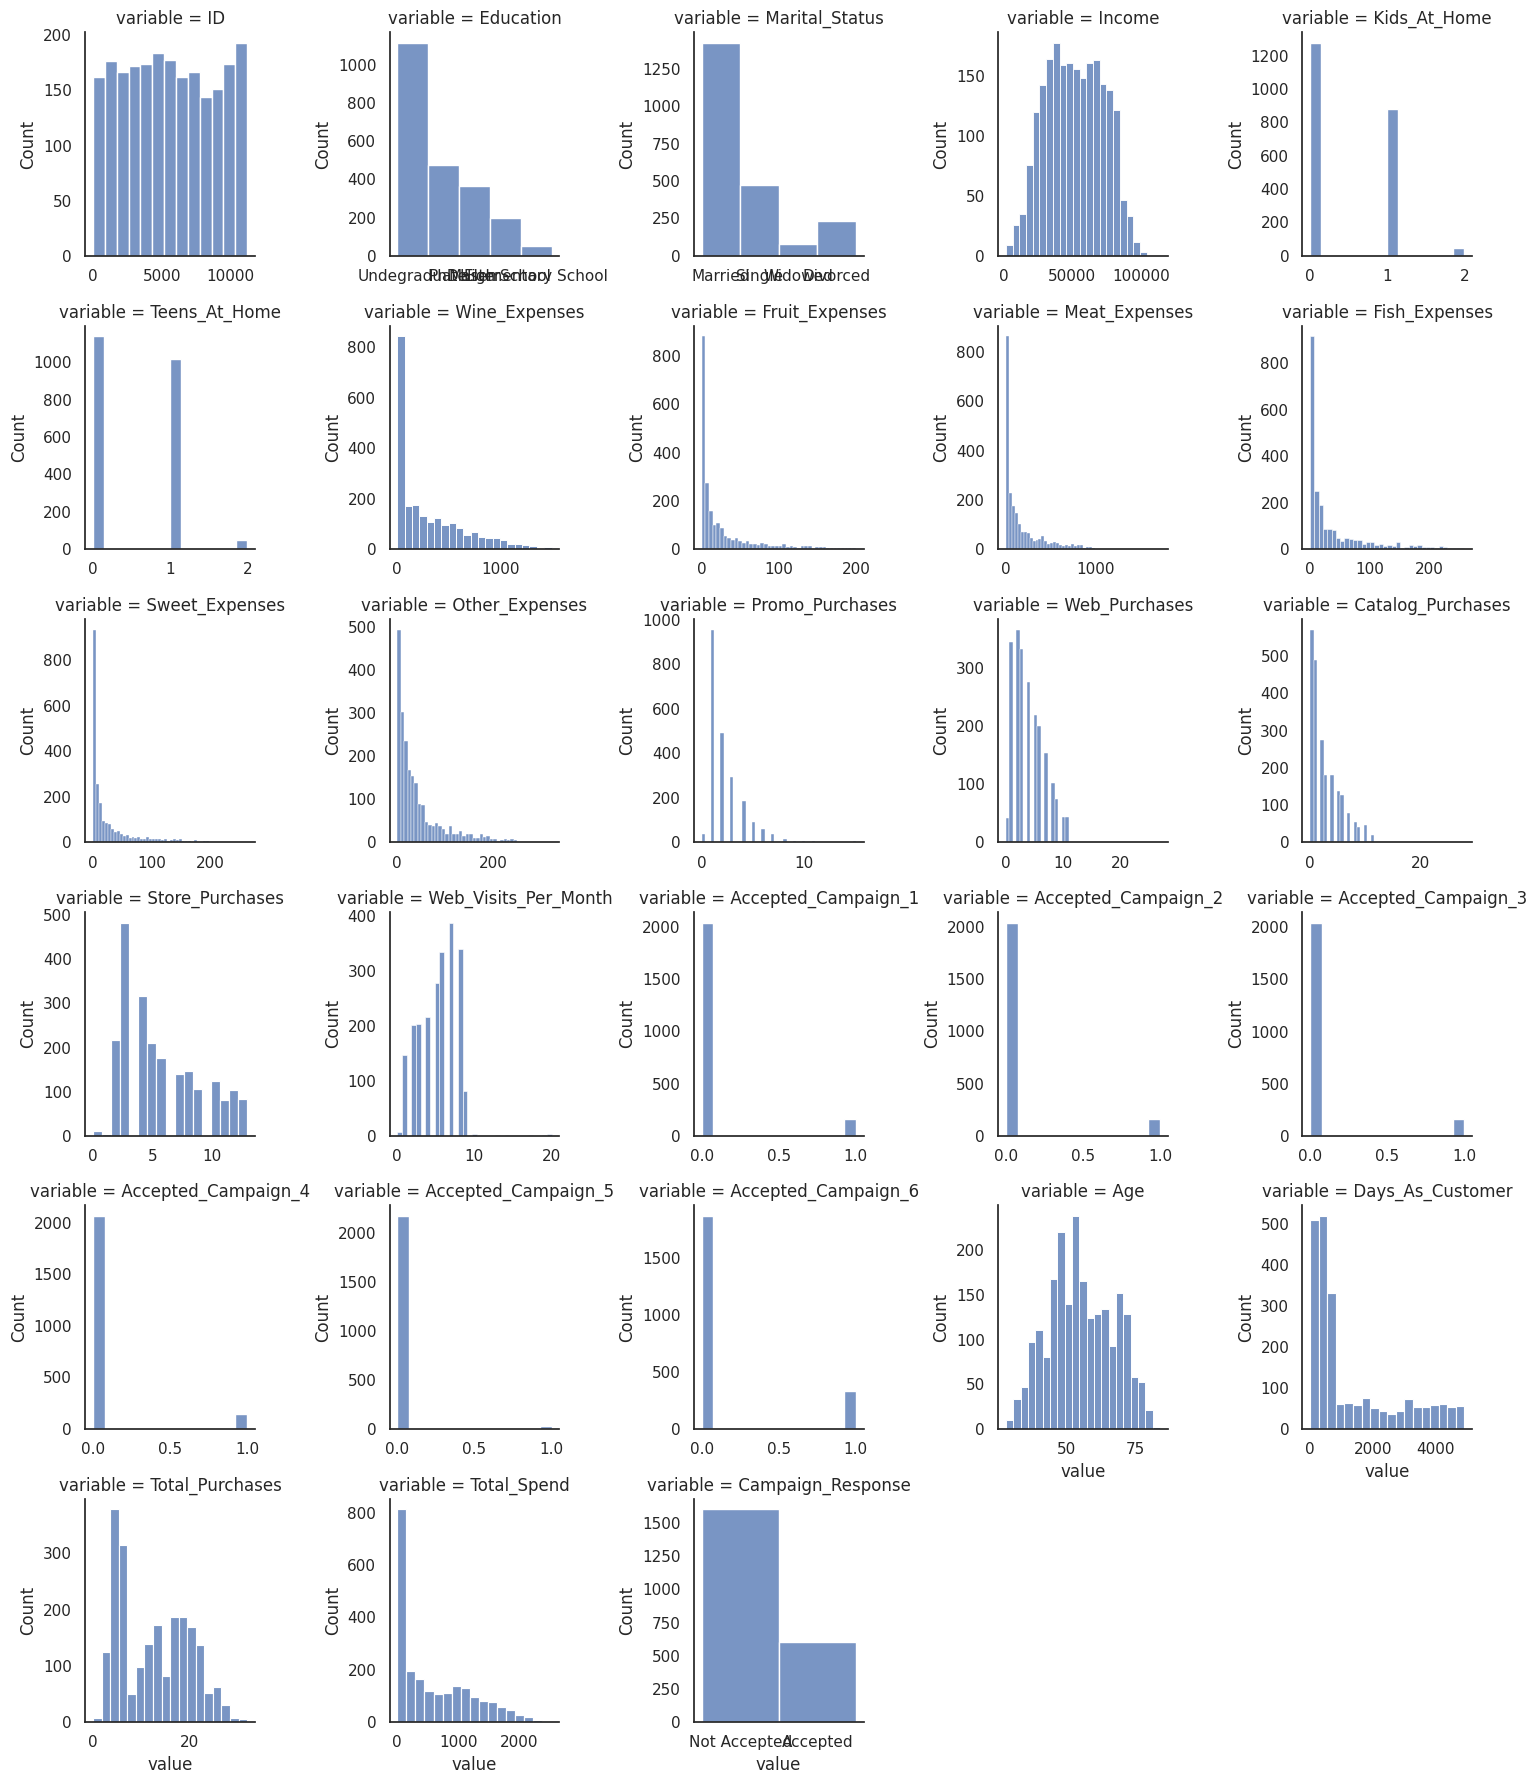

In [71]:
# Distribution of Variables
hist = pd.melt(df, value_vars=df.columns)
hist = sns.FacetGrid(hist, col='variable', col_wrap=5, sharex=False, sharey=False)
hist.map(sns.histplot, 'value')

## **What is the Proportion of Customers Who Accepted/Did Not Accept the Marketing Campaign?**

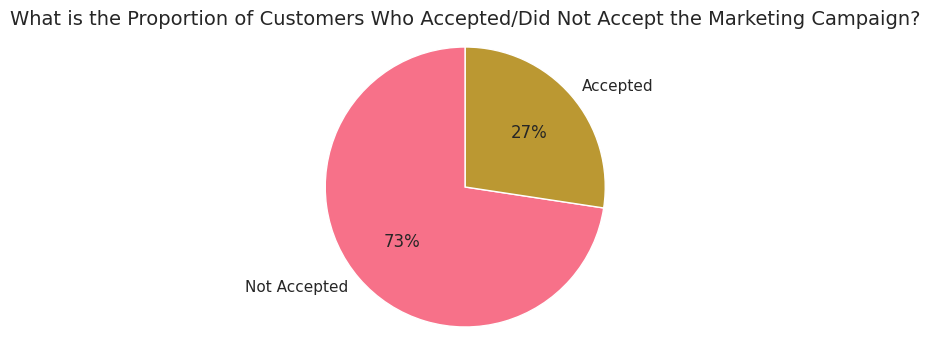

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the correct column name
counts = df['Campaign_Response'].value_counts()
labels = counts.index.tolist()

# Figure size
fig, ax = plt.subplots(figsize=(6, 4))

# Color palette
colors = sns.color_palette('husl')

# Pie chart
ax.pie(counts, labels=labels, colors=colors, autopct='%.0f%%', startangle=90)

# Title
ax.set_title('What is the Proportion of Customers Who Accepted/Did Not Accept the Marketing Campaign?', fontsize=14)

# Keep axes equal
ax.axis('equal')

# Display
plt.show()


## **Success Rate of Marketing Campaigns**

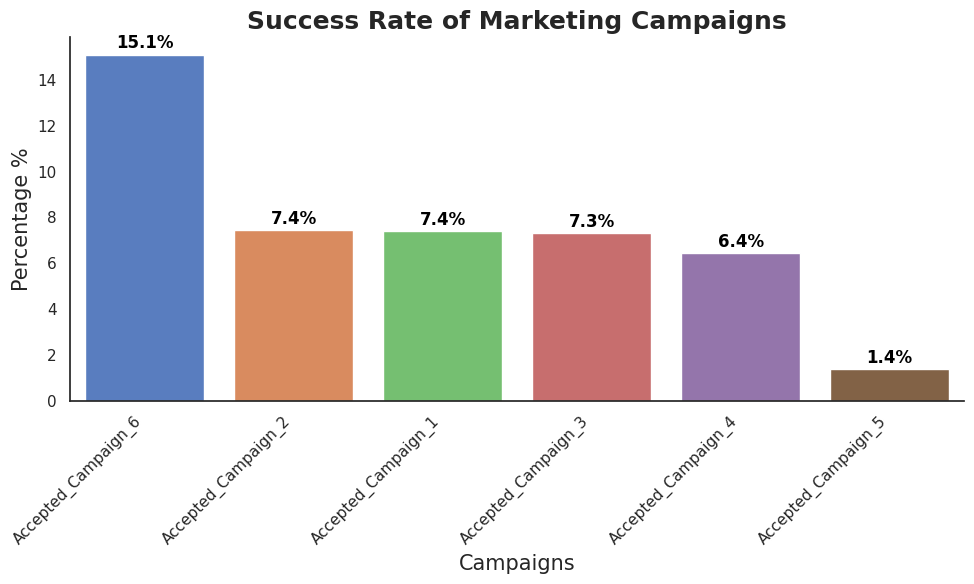

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of campaigns
campaigns = ['Accepted_Campaign_1',
             'Accepted_Campaign_2',
             'Accepted_Campaign_3',
             'Accepted_Campaign_4',
             'Accepted_Campaign_5',
             'Accepted_Campaign_6']

# Calculate the percentage
campaigns = pd.DataFrame(df[campaigns].mean() * 100, columns=['Percent']).reset_index()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='index', y='Percent', data=campaigns.sort_values('Percent', ascending=False), palette='muted')

# Labels
ax.set_xlabel('Campaigns', size=15)
ax.set_ylabel('Percentage %', size=15)
ax.set_title('Success Rate of Marketing Campaigns', size=18, weight='bold')

# Include percentage on the graph
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2,
                 p.get_height() + 0.5),  # Posicionando um pouco acima da barra
                ha='center',
                va='center',
                fontsize=12, color='black', weight='bold')

# Remove unnecessary borders and ticks
sns.despine()
ax.tick_params(bottom=False, left=False)

# Rotate X-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display
plt.tight_layout()
plt.show()


## **Does Age Influence Customers' Spending Decisions?**



In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2205 non-null   int64  
 1   Education             2205 non-null   object 
 2   Marital_Status        2205 non-null   object 
 3   Income                2205 non-null   float64
 4   Kids_At_Home          2205 non-null   int64  
 5   Teens_At_Home         2205 non-null   int64  
 6   Wine_Expenses         2205 non-null   int64  
 7   Fruit_Expenses        2205 non-null   int64  
 8   Meat_Expenses         2205 non-null   int64  
 9   Fish_Expenses         2205 non-null   int64  
 10  Sweet_Expenses        2205 non-null   int64  
 11  Other_Expenses        2205 non-null   int64  
 12  Promo_Purchases       2205 non-null   int64  
 13  Web_Purchases         2205 non-null   int64  
 14  Catalog_Purchases     2205 non-null   int64  
 15  Store_Purchases       2205

In [75]:
# Filter categorical columns and calculate the correlation of quantitative columns
df_corr = df.drop(['ID',
                   'Education',
                   'Marital_Status',
                   'Kids_At_Home',
                   'Teens_At_Home',
                   'Accepted_Campaign_1',
                   'Accepted_Campaign_2',
                   'Accepted_Campaign_3',
                   'Accepted_Campaign_4',
                   'Accepted_Campaign_5',
                   'Accepted_Campaign_6',
                   'Campaign_Response'], axis=1).corr()

In [76]:
column_corr = df_corr.loc['Age']

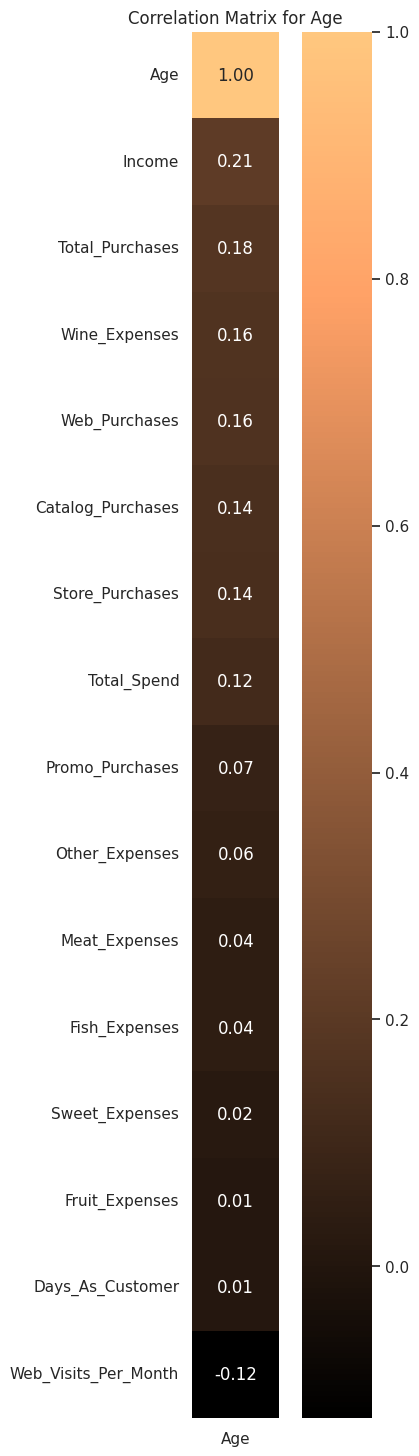

In [77]:
# Plot
plt.figure(figsize=(6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending=False)),
            annot=True,
            cmap='copper',
            cbar=True,
            square=True,
            fmt='.2f')
plt.title('Correlation Matrix for Age')
plt.show()

## **What is the Relationship Between Total Spend and Response to Marketing Campaigns?**

<Axes: xlabel='Campaign_Response', ylabel='Total_Spend'>

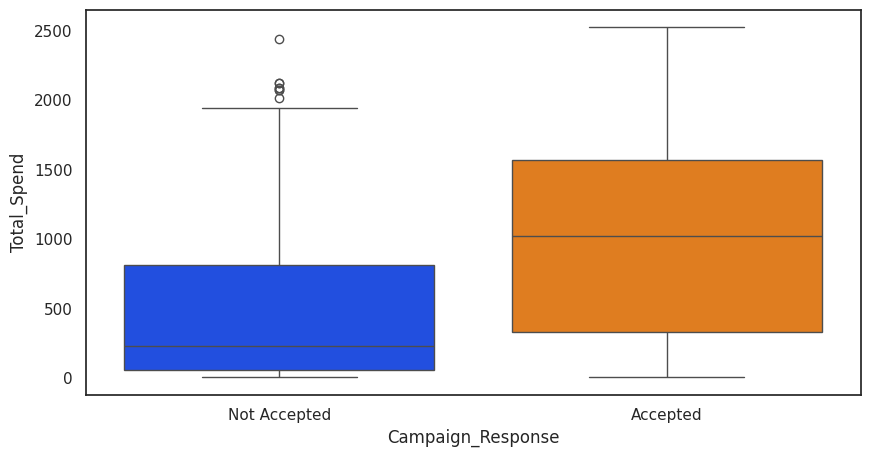

In [78]:
# Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Campaign_Response', y='Total_Spend', data=df, palette='bright')

## **In Which Product Category Do Customers Spend the Most?**

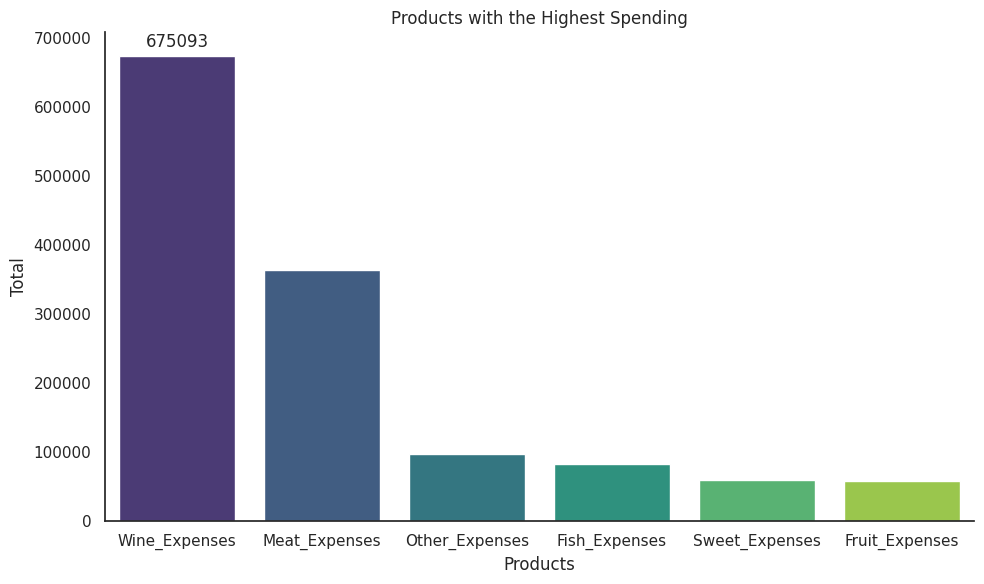

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Product categories and totals
products = ['Wine_Expenses', 'Fruit_Expenses', 'Meat_Expenses', 'Fish_Expenses', 'Sweet_Expenses', 'Other_Expenses']
df_products = df[products].sum().sort_values(ascending=False).reset_index(name='Sum')

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='index', y='Sum', data=df_products, palette='viridis')

# Labels, title, and annotations
ax.set(xlabel='Products', ylabel='Total', title='Products with the Highest Spending')
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', padding=3)

sns.despine()
plt.tight_layout()
plt.show()


## **What is the Relationship Between Wine Spending and Response to Marketing Campaigns?**

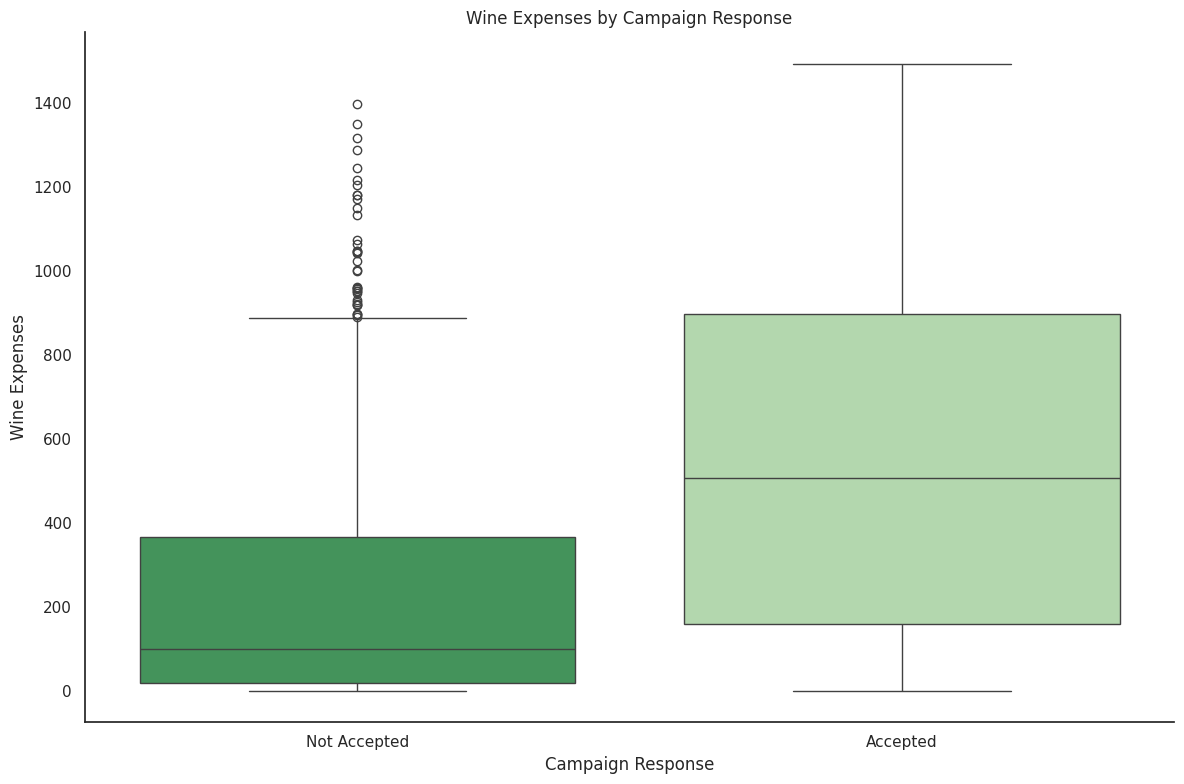

In [80]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Campaign_Response', y='Wine_Expenses', data=df, palette='Greens_r')

ax.set(xlabel='Campaign Response', ylabel='Wine Expenses', title='Wine Expenses by Campaign Response')
sns.despine()
plt.tight_layout()
plt.show()

## **What is the Relationship Between Income and Response to Marketing Campaigns?**

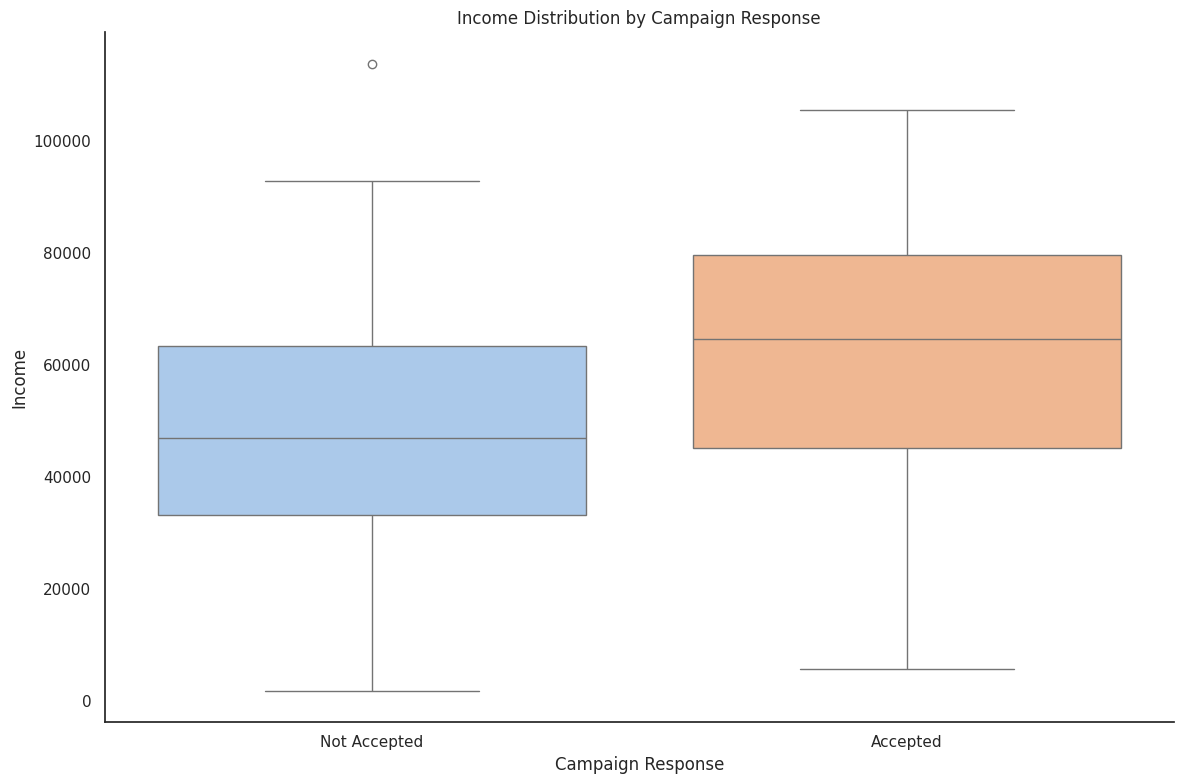

In [81]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='Campaign_Response', y='Income', data=df, palette='pastel', ax=ax)

ax.set(xlabel='Campaign Response', ylabel='Income', title='Income Distribution by Campaign Response')
sns.despine()
plt.tight_layout()
plt.show()

## **What is the Relationship Between Income and Total Spending?**


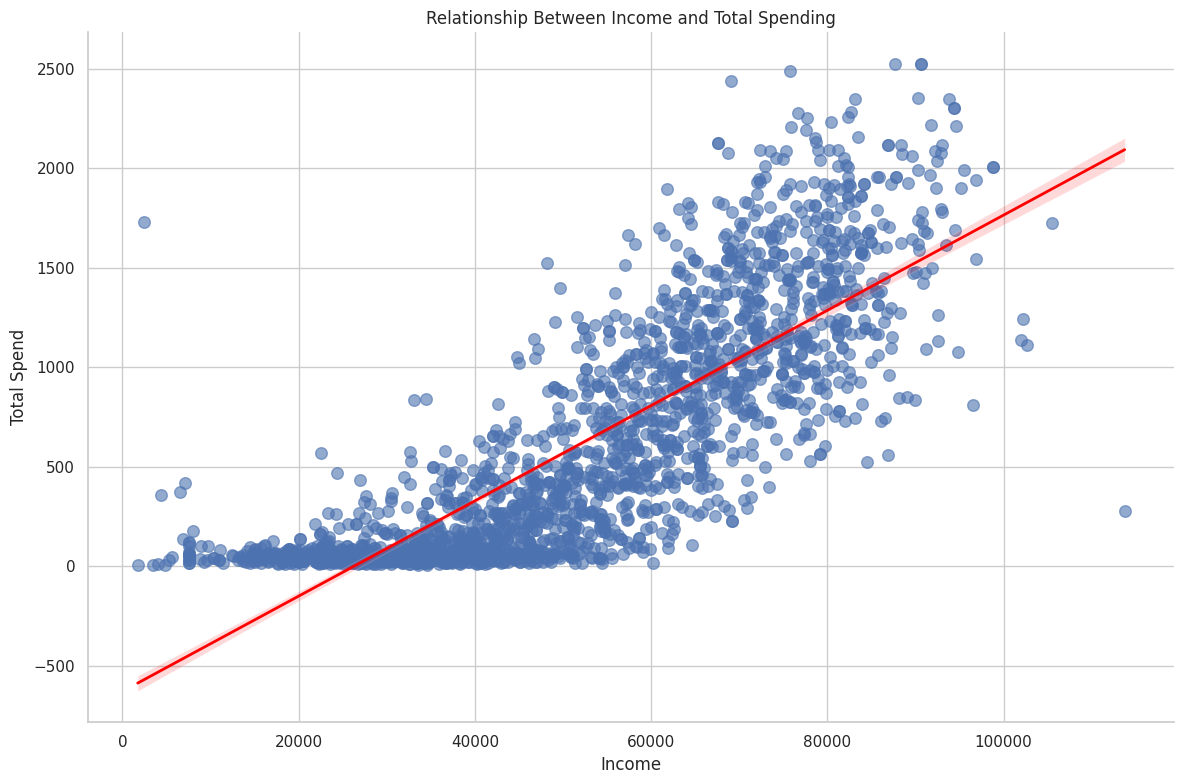

In [82]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

sns.regplot(x='Income', y='Total_Spend', data=df,
            scatter_kws={'s': 70, 'alpha': 0.6},
            line_kws={'color': 'red', 'linewidth': 2},
            ax=ax)

ax.set(xlabel='Income', ylabel='Total Spend', title='Relationship Between Income and Total Spending')
sns.despine()
plt.tight_layout()
plt.show()

## **What Factors Are Most Important in Explaining the Customer's Decision to Accept or Reject the Campaign?**

In [83]:
df.head()

,ID,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Wine_Expenses,Fruit_Expenses,Meat_Expenses,Fish_Expenses,...,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6,Age,Days_As_Customer,Total_Purchases,Total_Spend,Campaign_Response
0,9970,Undegraduate,Married,55375.0,0,1,42,11,57,10,...,0,0,0,0,0,47,255,8,162,Not Accepted
1,4002,PhD,Married,77037.0,0,1,463,96,333,168,...,0,0,0,0,0,64,259,26,1123,Not Accepted
2,10914,Undegraduate,Single,24163.0,1,1,4,1,7,2,...,0,0,0,0,0,54,1294,4,17,Not Accepted
3,7279,PhD,Married,69476.0,0,0,260,86,559,63,...,0,0,0,0,0,55,272,14,1044,Not Accepted
4,10582,Undegraduate,Married,72063.0,0,1,180,32,348,76,...,0,0,0,0,0,45,2665,19,758,Not Accepted


In [84]:
# Convert text variables into numerical representation using One-Hot Encoding
df_imp = pd.get_dummies(df, columns=['Education', 'Marital_Status'])

In [85]:
df_imp.columns

Index(['ID', 'Income', 'Kids_At_Home', 'Teens_At_Home', 'Wine_Expenses',
       'Fruit_Expenses', 'Meat_Expenses', 'Fish_Expenses', 'Sweet_Expenses',
       'Other_Expenses', 'Promo_Purchases', 'Web_Purchases',
       'Catalog_Purchases', 'Store_Purchases', 'Web_Visits_Per_Month',
       'Accepted_Campaign_1', 'Accepted_Campaign_2', 'Accepted_Campaign_3',
       'Accepted_Campaign_4', 'Accepted_Campaign_5', 'Accepted_Campaign_6',
       'Age', 'Days_As_Customer', 'Total_Purchases', 'Total_Spend',
       'Campaign_Response', 'Education_Elementary School',
       'Education_High School', 'Education_Master', 'Education_PhD',
       'Education_Undegraduate', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Widowed'],
      dtype='object')

In [86]:
df_imp.head()

,ID,Income,Kids_At_Home,Teens_At_Home,Wine_Expenses,Fruit_Expenses,Meat_Expenses,Fish_Expenses,Sweet_Expenses,Other_Expenses,...,Campaign_Response,Education_Elementary School,Education_High School,Education_Master,Education_PhD,Education_Undegraduate,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widowed
0,9970,55375.0,0,1,42,11,57,10,28,14,...,Not Accepted,False,False,False,False,True,False,True,False,False
1,4002,77037.0,0,1,463,96,333,168,53,10,...,Not Accepted,False,False,False,True,False,False,True,False,False
2,10914,24163.0,1,1,4,1,7,2,1,2,...,Not Accepted,False,False,False,False,True,False,False,True,False
3,7279,69476.0,0,0,260,86,559,63,9,67,...,Not Accepted,False,False,False,True,False,False,True,False,False
4,10582,72063.0,0,1,180,32,348,76,32,90,...,Not Accepted,False,False,False,False,True,False,True,False,False


In [87]:
# Let's remove variables that would be redundant or unnecessary
# Since we are creating X (input data), we remove Campaign_Response (output data)
X = df_imp.drop(['ID',
                 'Wine_Expenses',
                 'Fruit_Expenses',
                 'Meat_Expenses',
                 'Fish_Expenses',
                 'Sweet_Expenses',
                 'Other_Expenses',
                 'Web_Purchases',
                 'Catalog_Purchases',
                 'Store_Purchases',
                 'Accepted_Campaign_1',
                 'Accepted_Campaign_2',
                 'Accepted_Campaign_3',
                 'Accepted_Campaign_4',
                 'Accepted_Campaign_5',
                 'Accepted_Campaign_6',
                 'Campaign_Response'], axis=1)


In [88]:
# Convert the variable into a numerical representation
y = df_imp['Campaign_Response'].map({'Not Accepted': 0, 'Accepted': 1})
y

,Campaign_Response
0,0
1,0
2,0
3,0
4,0
...,...
2232,0
2233,0
2234,0
2235,0


In [89]:
# Create the model
rf_model = RandomForestClassifier(random_state=43)

In [90]:
# Train the model
rf_model = rf_model.fit(X, y)

In [91]:
# Extract the importance of each variable
importances = rf_model.feature_importances_

In [92]:
# Standard deviation of feature importances
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

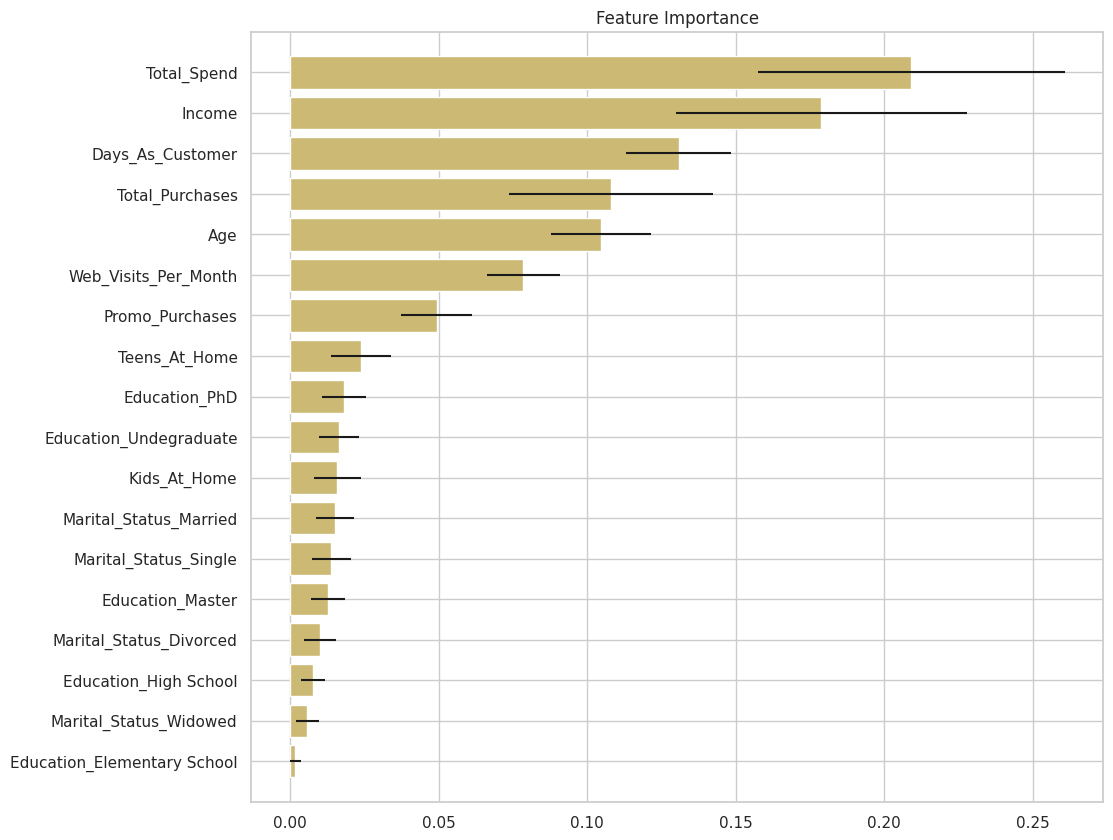

In [93]:
# Indexes
indexes = np.argsort(importances)

# Plot
plt.figure(1, figsize=(11, 10))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indexes], color="y", xerr=std[indexes], align="center")
plt.yticks(range(X.shape[1]), X.columns[indexes])
plt.ylim([-1, X.shape[1]])
plt.show()

## **Hypothesis Testing**

Educational level does not seem to be relevant in explaining the customer's response to the marketing campaign. On the other hand, income is quite relevant. It is likely that the average income differs between educational levels.

We will test the hypothesis that there is a significant difference between the average income of customers with Higher Education and those without Higher Education. Before that, let's explore this relationship.

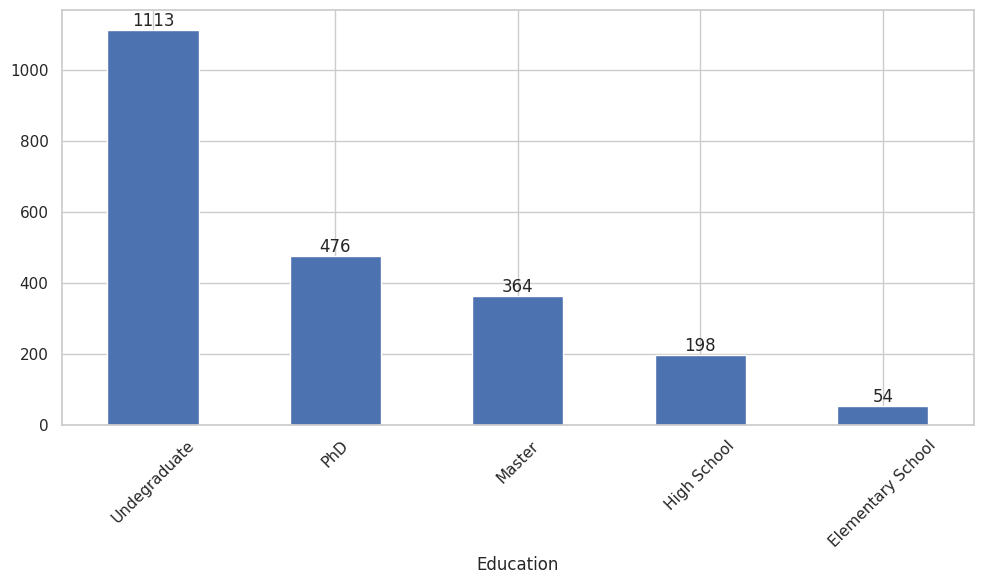

In [94]:
# Plot total customers by educational level
plt.figure(figsize=(10, 6))
ax = df.Education.value_counts().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show();

In [95]:
# Calculate the average
average_income = df.groupby('Education')['Income'].mean().reset_index()
average_income = average_income.sort_values(by='Income')

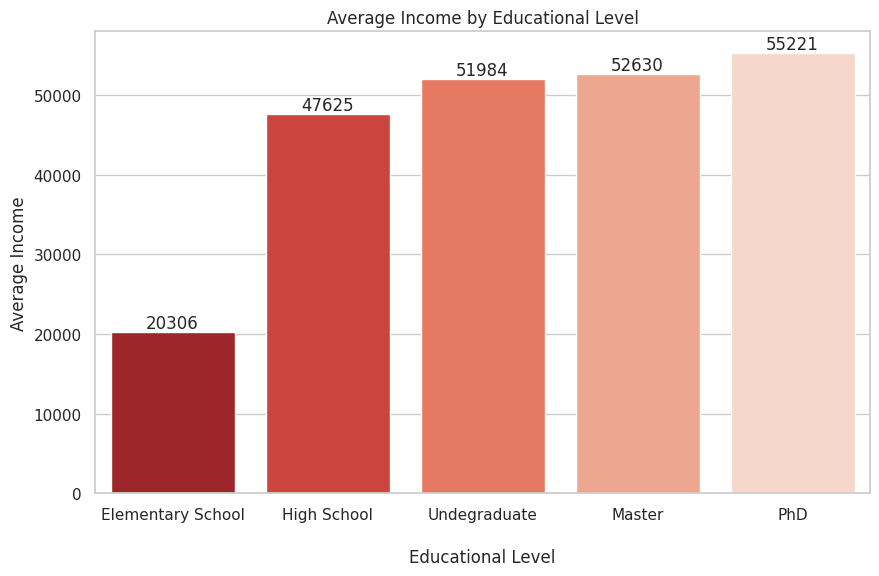

In [96]:
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_income['Education'], y=average_income['Income'], data=df, palette='Reds_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='bottom')
plt.xlabel('\nEducational Level')
plt.ylabel('Average Income')
plt.title('Average Income by Educational Level')
plt.show()


## **Defining the Hypotheses**

To choose the Hypothesis Test, we need to verify whether the variables follow a normal distribution or not. If the variables follow a normal distribution, we can use a parametric test. Otherwise, we should use a non-parametric test.

**Null Hypothesis (H0):**
 The null hypothesis is a statement of "no difference." In our case, it states that "There is no significant difference in the average income of groups with and without higher education." This means that any observed differences in the data between the groups can be attributed to chance.

**Alternative Hypothesis (H1):**
 The alternative hypothesis contradicts the null hypothesis. It states that "There is a significant difference in the average income of groups with and without higher education." This implies that the observed differences are real and not merely the result of random variations.

When you conduct a statistical test (such as a Student’s t-test for independent samples or a non-parametric test like the Mann-Whitney U test if the t-test assumptions are not met), you are testing these hypotheses. The result of the test (specifically, the p-value) indicates whether you should reject the null hypothesis or not:

**Low p-value (typically < 0.05):**
 If the test's p-value is lower than the chosen significance level (usually 0.05), you reject the null hypothesis, suggesting that there is sufficient evidence to claim that there is a significant difference in average income between the groups.

**High p-value:**
 If the p-value is greater than the significance level, you do not reject the null hypothesis, indicating that there is not enough evidence to claim that there is a significant difference.

It is important to remember that "failing to reject the null hypothesis" is not the same as proving the null hypothesis is true. It simply means that, with the available data, there is not enough evidence to support the alternative hypothesis.

In [97]:
# Numerical representation of the categorical variable
df['Education'] = df['Education'].map({'Elementary School': 1,
                                       'High School': 2,
                                       'Undegraduate': 3,
                                       'Master': 4,
                                       'PhD': 5})

In [98]:
print(df['Education'].unique())


[3 5 4 2 1]


In [99]:
df.head()

,ID,Education,Marital_Status,Income,Kids_At_Home,Teens_At_Home,Wine_Expenses,Fruit_Expenses,Meat_Expenses,Fish_Expenses,...,Accepted_Campaign_2,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_6,Age,Days_As_Customer,Total_Purchases,Total_Spend,Campaign_Response
0,9970,3,Married,55375.0,0,1,42,11,57,10,...,0,0,0,0,0,47,255,8,162,Not Accepted
1,4002,5,Married,77037.0,0,1,463,96,333,168,...,0,0,0,0,0,64,259,26,1123,Not Accepted
2,10914,3,Single,24163.0,1,1,4,1,7,2,...,0,0,0,0,0,54,1294,4,17,Not Accepted
3,7279,5,Married,69476.0,0,0,260,86,559,63,...,0,0,0,0,0,55,272,14,1044,Not Accepted
4,10582,3,Married,72063.0,0,1,180,32,348,76,...,0,0,0,0,0,45,2665,19,758,Not Accepted


In [100]:
# Data to be tested
test_data = df[['Income', 'Education']]
test_data.head()

,Income,Education
0,55375.0,3
1,77037.0,5
2,24163.0,3
3,69476.0,5
4,72063.0,3


##**Applying the Normality Test to Select the Appropriate Hypothesis Test**

The Shapiro-Wilk Test is a statistical test used to assess the normality of a data distribution. This test is particularly useful for small samples (typically less than 50 observations), although it can also be applied to larger datasets. The hypotheses for the Shapiro-Wilk Test are formulated as follows:

**Null Hypothesis (H0):** The null hypothesis of the Shapiro-Wilk Test states that the data follows a normal distribution. In other words, it assumes that the sample distribution does not differ significantly from a theoretical normal distribution.

**Alternative Hypothesis (H1):** The alternative hypothesis is that the data does not follow a normal distribution. This suggests that there is sufficient evidence in the data to indicate that the distribution deviates from normality.

When performing the Shapiro-Wilk Test, you calculate a p-value that indicates the probability of obtaining the observed sample (or a more extreme one) assuming the null hypothesis is true.

**Low p-value (typically < 0.05):** If the p-value is low (less than the chosen significance level, such as 0.05), you reject the null hypothesis, indicating that the data does not come from a normal distribution.
High p-value: If the p-value is high, you do not reject the null hypothesis, suggesting there is not enough evidence to say the data does not follow a normal distribution.
It is important to note that the Shapiro-Wilk Test, like other normality tests, can be sensitive to sample size. With very large samples, the test may detect small deviations from normality that may not be practically relevant. On the other hand, in very small samples, the test may not have enough power to detect significant deviations from normality.

If you need help applying the Shapiro-Wilk Test to your data or interpreting the results, feel free to ask!

In [101]:
from scipy.stats import shapiro

def test_normality(columns):

    for col in columns:

        statistic, p_value = shapiro(test_data[col])

        alpha = 0.05

        if p_value < alpha:
            print(f'\n{col}: Alpha {alpha} < p-value {p_value:.2f} - Rejecting H0: The data is not normally distributed.')
        else:
            print(f'\n{col}: Alpha {alpha} > p-value {p_value:.2f} - Failing to Reject H0: The data follows a normal distribution.')

# Example usage
test_normality(test_data.columns)



Income: Alpha 0.05 < p-value 0.00 - Rejecting H0: The data is not normally distributed.

Education: Alpha 0.05 < p-value 0.00 - Rejecting H0: The data is not normally distributed.


##**Applying Non-Parametric Hypothesis Testing**
The Mann-Whitney U test is a statistical technique used to compare differences between two independent groups when the data does not necessarily follow a normal distribution. This test is a non-parametric alternative to the Student’s t-test for independent samples and is often used when the conditions for the t-test are not met (for example, when the data distribution is significantly non-normal).

In [102]:
# Creating the groups
group_with_degree = df[df['Education'].isin([5, 4, 3])]['Income']
group_without_degree = df[df['Education'].isin([1, 2])]['Income']

In [103]:
# Mann-Whitney U Test
statistic, p_value = mannwhitneyu(group_with_degree, group_without_degree)

# Significance level
alpha = 0.05

# Result
if p_value < alpha:
    print("We reject the null hypothesis: There is a significant difference in income averages.")
else:
    print("We fail to reject the null hypothesis: There is no significant difference in income averages.")


We reject the null hypothesis: There is a significant difference in income averages.


## **Conclusion**
The most relevant factors explaining customer responses to marketing campaigns are total spending history, income, total time as a customer, age, and total previous purchases. In other words, loyal customers are more likely to accept marketing campaigns.

Educational level and marital status do not seem to be relevant factors in explaining the response to the marketing campaign. Therefore, we decided to apply a hypothesis test.

When testing the hypothesis that there is a significant difference between the average income of customers with or without a degree, it became evident that a difference exists. We also observed that higher educational levels correspond to higher average income.

Therefore, the company should segment its marketing campaigns for different audiences and target the campaigns based on income and educational level, also considering total spending history, total time as a customer, age, and total previous purchases.

In [104]:
%reload_ext watermark
%watermark -a "@panData"

Author: @panData



In [105]:
#%watermark -v -m

In [106]:
#%watermark --iversions